In [118]:
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
table = pd.read_csv('videodata.csv')
table.describe()

,time,like,where,freq,busy,educ,sex,age,home,math,work,own,cdrom,email,grade
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.242857,4.076923,21.967033,16.461538,12.153846,14.549451,0.582418,19.516484,0.758242,1.406593,10.373626,0.736264,5.604396,0.791209,3.252747
std,3.777040,10.098659,38.476097,33.896020,32.384126,34.670918,0.495893,1.846093,0.430521,10.354793,19.327958,0.443099,22.647482,0.408697,0.607242
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,0.000000,3.000000,3.000000,3.000000,0.000000,1.000000,1.000000,19.000000,1.000000,0.000000,5.000000,1.000000,0.000000,1.000000,3.000000
75%,1.250000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,14.500000,1.000000,0.000000,1.000000,4.000000
max,30.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.000000,33.000000,1.000000,99.000000,99.000000,1.000000,99.000000,1.000000,4.000000


To estimate whether the students group who filled out the servey like playing video games or not, we can get the stats from the "like" column, in which 1=never played, 2=very much, 3=somewhat, 4=not really, 5=not at all.

*Note* Here to describe the data, we're not filtering out the data that was filled out by people who do not play video games. Not having the initiative to play computer games in some degree indicates the low level of interest in video games, thus should be included.

In [120]:
table = table[table['like']>0]
table = table[table['like']<6]
#clean the outlier data
like = table['like']
like.describe()

count    90.000000
mean      3.022222
std       0.873811
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: like, dtype: float64

As a conclusion, we see that the mean is 4, which represents for "not really". Thus we can reach to a conclusion that most students in the sample weren't really enjoying playing computer games.

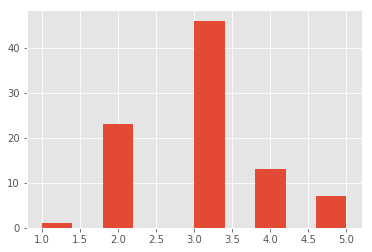

In [121]:
like.hist()

In [122]:
#using pearson correlation calculation
corr_table = table.corr().loc['like'].abs().sort_values(ascending=False)[1:]
print corr_table

freq     0.526318
busy     0.476343
educ     0.438547
where    0.310757
time     0.276465
sex      0.262917
age      0.145666
home     0.103808
cdrom    0.103171
work     0.098371
grade    0.095085
email    0.018104
own      0.015422
math     0.002689
Name: like, dtype: float64


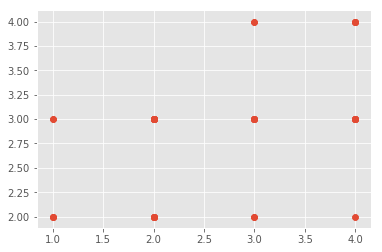

In [125]:
matplotlib.style.use('ggplot')

table_freq = table[table['freq']<= 4]
plt.scatter(table_freq['freq'],table_freq['like'])
plt.show()

As an example here we use the variable "sex" to investigate in the influence of this variable to how much students enjoy playing computer games. 
Here sex=1 is male, sex=0 is female.
We can easily find out that male students have a greater preferences on choice 2-very much and 3-somewhat than female do, thus showing a gender differences in how much students enjoy playing video games.

In [126]:
ct_sex = pd.crosstab(table["sex"],table["like"],normalize=0)
print ct_sex

like         1         2         3         4         5
sex                                                   
0     0.000000  0.131579  0.552632  0.210526  0.105263
1     0.019231  0.346154  0.480769  0.096154  0.057692
